In [344]:
# Imports and plot parameters

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%config InlineBackend.figure_format = 'retina'

In [345]:
warnings.filterwarnings("ignore")

In [346]:
model_name = 'model_2.0_1.7e+51'

In [347]:
# Helper functions
# Plot density 

def plot_params(ax, ml_x, mil_x, ml_y, mil_y, s, invert=False):
    
    '''
    Remarks: Plotting parameters
    ax: axis object
    ml_x: major locator 'x'
    mil_x: minor locator 'x'
    ml_y: major locator 'y'
    mil_y: minor locator 'y'
    invert: Bool for the y-axis to be inverted 
    
    '''
    
    if invert:
        ax.invert_yaxis()
        
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', 
                   length = 13, width = 1.5, labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', 
                   length = 6, width = 0.8, labelsize = 20)
    ax.xaxis.set_major_locator(MultipleLocator(ml_x))
    ax.xaxis.set_minor_locator(MultipleLocator(mil_x))
    ax.yaxis.set_major_locator(MultipleLocator(ml_y))
    ax.yaxis.set_minor_locator(MultipleLocator(mil_y))
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize = s)
    #tick.label1.set_fontweight('bold')
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize = s)
        


def plot_density(file_name, model_name, ml_x=5000, mil_x=1000, 
                 ml_y=1, mil_y=0.1, log_axis=False):
    
    '''
    Plot density from a model file
    
    '''
    col_names = ['Velocity', 'Density']       # (km/s, g/cm^3)
    density_df = pd.read_csv(file_name, names = col_names, sep='\s+', engine='python', skiprows=1) 
    
    fig_app = plt.figure(figsize = (5, 5), facecolor='white')
    ax = fig_app.add_subplot(111)
    plt.rcParams['axes.linewidth'] = 2
    plot_params(ax, ml_x = ml_x, mil_x = mil_x, ml_y = ml_y, mil_y = mil_y, s=10, invert=False)
    legend_properties = {'size':15, 'weight':'book'}
    ax.plot(density_df['Velocity'], density_df['Density'], 'r--', label=model_name)
    if log_axis:
        ax.set_yscale("log")
        ax.set_xscale("log")
    
    ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
    ax.set_ylabel(r'$\rm Density\ [g/cm^{3}]$', fontsize=20)
    ax.legend(fontsize=12, borderaxespad=3)
    ax.set_title("Density vs Velocity", fontsize=20)
    
    return density_df



def plot_abundance(file_name, elements=['c12', 'o16', 'si28', 's32', 'ca40',
                                        'fe54', 'co56', 'ni56', 'ni58'], save_file = False):
    
    '''
    Plot the density and abundance profiles for 
    Info: Remove the units from density and velocity for file readability.
    Velocity, Density, c12, o16, na22, mg24, si28, s32, ca40, sc42, ti44, v46, cr48, fe52, ni56, ni58
    '''
    legend_properties = {'size':15, 'weight':'book'}

    abundance_df = pd.read_csv(file_name, sep='\s+', engine='python')
    
    constant = (4*np.pi)/3
    time_exp = 100                           # sec
    M_solar = 1.989e33                       # gm
    
    mean_c12 = abundance_df['c12'].mean()
    #print ("c_12 abundance:", mean_c12)
    mean_o16 = abundance_df['o16'].mean()
    #print ("o_16 abundance:", mean_o16)
    mean_si28 = abundance_df['si28'].mean()
    #print ("si_28 abundance:", mean_si28)
    mean_s32 = abundance_df['s32'].mean()
    #print ("s_32 abundance:", mean_s32)
    mean_ca40 = abundance_df['ca40'].mean()
    #print ("ca_40 abundance:", mean_ca40)
    mean_ti48 = abundance_df['ti48'].mean()
    #print ("ti_48 abundance:", mean_ti48)
    mean_cr53 = abundance_df['cr53'].mean()
    #print ("cr_53 abundance:", mean_cr53)
    mean_fe54 = abundance_df['fe52'].mean()
    #print ("fe_54 abundance:", mean_fe54)
    mean_fe56 = abundance_df['fe56'].mean()
    #print ("fe_56 abundance:", mean_fe56)
    mean_co55 = abundance_df['co55'].mean()
    #print ("co_55 abundance:", mean_co55)
    mean_ni56 = abundance_df['ni56'].mean()
    #print ("ni_56 abundance:", mean_ni56)
    mean_ni58 = abundance_df['ni58'].mean()
    #print ("ni_58 abundance:", mean_ni58)
    
    #abundance_df['Sum'] = abundance_df[:, 2:].sum(axis=1)
    
    
    abundance_df_new = abundance_df[['c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54', 
                                     'ni56', 'ni58']]
    
    formats = {'c12': '{:.3f}', 'o16': '{:.3f}', 'ne20': '{:.3f}', 'mg24': '{:.3f}', 'si28': '{:.3f}', 
                's32': '{:.3f}', 'ca40': '{:.3f}', 'fe54': '{:.3f}', 'ni56': '{:.3f}', 'ni58': '{:.3f}'}
    
    abundance_df_new['Sum'] = abundance_df_new.sum(axis=1)
    abundance_df_new.iloc[:, :-1] = abundance_df_new.iloc[:, :-1].div(abundance_df_new.Sum, axis=0)
    
    abundance_df_new = abundance_df_new[['c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54', 
                                     'ni56', 'ni58']]

    if save_file:
        for col, f in formats.items():
            abundance_df_new[col] = abundance_df_new[col].map(lambda x: f.format(x))
            
        abundance_df_new.to_csv('/Users/anirbandutta/Documents/SNEXP/TypeIa_Models/vm_abundances.dat', 
                             sep=',', header=True, index=False)
    
    fig_app = plt.figure(figsize = (7, 7))
    ax = fig_app.add_subplot(111)
    plt.rcParams['axes.linewidth'] = 2
    plot_params(ax, ml_x = 5000, mil_x = 1000, ml_y = 0.1, mil_y = 0.01, s=10, invert=False)

    ax.plot(abundance_df['Velocity'], abundance_df['c12'], color='#0b090a', label='C')
    ax.plot(abundance_df['Velocity'], abundance_df['o16'], color='#660708', label='O')
    ax.plot(abundance_df['Velocity'], abundance_df['na22'], color='orange', label='Na')
    ax.plot(abundance_df['Velocity'], abundance_df['mg24'], color='cyan', label='Mg')
    ax.plot(abundance_df['Velocity'], abundance_df['si28'], color='#ff6d00', label='Si')
    ax.plot(abundance_df['Velocity'], abundance_df['s32'], color='#ff002b', label='S')
    ax.plot(abundance_df['Velocity'], abundance_df['ca40'], color='#004e89', label='Ca')
    ax.plot(abundance_df['Velocity'], abundance_df['fe54'], color='#126782', label='Fe54')
    ax.plot(abundance_df['Velocity'], abundance_df['ni56'], color='#072ac8', label='Ni56')
    ax.plot(abundance_df['Velocity'], abundance_df['ni58'], color='#4361ee', label='Ni58')
    
    ax.set_xlabel(r'$\rm Velocity\ [km/s]$', fontsize=20)
    ax.set_ylabel(r'$\rm Mass\ fraction$', fontsize=20)
    ax.set_title("Abundance Profiles", fontsize=20)
    ax.set_yscale("log")
    ax.set_xscale("log")
    legend_1 = ax.legend(frameon= False, 
                     fancybox = False, shadow = False, framealpha=0.3, facecolor = 'white', 
                     prop = legend_properties, borderaxespad=3, loc='upper center',
                    bbox_to_anchor=(0.5, 1.50), ncol=3, markerscale=2.0) 

    
    return abundance_df_new


def rad_temp(v, TO):
    
    if v < 1.0e9:
        temp = TO * (1 + (1e9 - v)/1e9)
    else:
        temp = TO * (v/1e9)**(-2.)
        
    return temp    


def sedona_abundances(model_df, profile_df, model_name, save_file=False):
    
    df = pd.DataFrame()
    elem_df = pd.DataFrame()

    for columns in profile_df.columns[2:]:
    
        interp = interp1d(x = profile_df['velocity'], y = profile_df[columns], fill_value = 'extrapolate')
        element = interp(model_df['velocity'] / 10**5)
        data = pd.DataFrame({columns: element})
        elem_df[columns] = df.append(data)               # append does not happen in-place
        
    elem_df['Sum'] = elem_df.sum(axis=1)
    elem_df.iloc[:, :-1] = elem_df.iloc[:, :-1].div(elem_df.Sum, axis=0)
    elem_df['New_Sum'] = elem_df.iloc[:, :-1].sum(axis=1)
    
    elem_df = elem_df.drop(['Sum', 'New_Sum'], axis=1)
    
    new_model_df = pd.concat([model_df, elem_df], axis=1)
    
    TO = 1.0e4                     # initial temperature
    texp = 1.0 * 86400             # in secs
    
    #new_model_df['velocity'] = new_model_df['velocity'].apply(lambda x: x ) # km/s --> cm/s
    new_model_df['radius'] = new_model_df['velocity'].apply(lambda x: x * texp)    # cm
    new_model_df['temp'] = new_model_df['velocity'].apply(lambda x: rad_temp(x, TO))
    
    new_model_df = new_model_df[['radius', 'velocity', 'density', 'temp',
                                          'c12', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ca40', 'fe54',
                                          'ni56', 'ni58']]
    
    
    formats = {'radius': '{:10.4e}', 'velocity': '{:10.4e}', 'temp': '{:10.4e}', 'c12': '{:.3f}', 
               'o16': '{:.3f}', 'ne20': '{:.3f}', 'mg24': '{:.3f}', 'si28': '{:.3f}', 's32': '{:.3f}', 
               'ca40': '{:.3f}', 'fe54': '{:.3f}', 'ni56': '{:.3f}', 'ni58': '{:.3f}'}
    
    for col, f in formats.items():
        new_model_df[col] = new_model_df[col].map(lambda x: f.format(x))
        
        
    # C, O, Ne, Mg, Si, S, Ca, Fe54, Ni56, Ni58
    if save_file:
        Z = [6, 8, 10, 12, 14, 16, 20, 26, 28, 28]
        A = [12, 16, 20, 24, 28, 32, 40, 54, 56, 58]
        len_z = len(Z)
        f = open('/Users/anirbandutta/Documents/SNEXP/Violent_Merger_2012_Model_Ejecta/' + 'sed_' + model_name + '.mod', 'w')
    
        size = new_model_df.shape
        rmin = 0.0
        texp_d = 86400
        
        f.write("1D_sphere standard\n")
        f.write(str(size[0])+'\t'+str(rmin)+'\t'+str(texp_d)+'\t'+str(len_z)+'\n')
        f.write(str(6.12)+'\t'+str(8.16)+'\t'+str(10.20)+'\t'+'\t'+str(12.24)+'\t'+
            str(14.28)+'\t'+str(16.32)+'\t'+str(20.40)+'\t'+str(26.54)+'\t'+str(28.56)+'\t'+str(28.58)+'\n')
    
        new_model_df.to_csv(f, sep='\t', header=False, index=False)

        f.close()

    return new_model_df
    

def homologous_expansion(rho_ref, t_ref, t_exp):
        
    '''
    rho_ref : rho(v) at time explosion time t0.
    t_ref: reference explosion epoch in days.
    t_exp: time since explosion when density is being calculated in days.
        
    returns: rho
        
    '''
        
    rho = rho_ref * (t_ref / t_exp)**3
        
    return rho
    
    
def rad_temp_for_loop(v, TO):
    
    
    temp = np.zeros(len(v))
    
    for i in range(len(v)):
        if v[i] < 1.0e9:
            temp[i] = TO * (1 + (1e9 - v[i])/1e9)
        else:
            temp[i] = TO * (v[i]/1e9)**(-2.)
            
    
    return temp    



In [348]:
vm_filepath = '/Users/anirbandutta/Downloads/merger_2012_11+09/'
vm_abundances = vm_filepath + 'merger_2012_11_09_isotopes.dat'
vm_density = vm_filepath + 'merger_2012_11_09_density.dat'

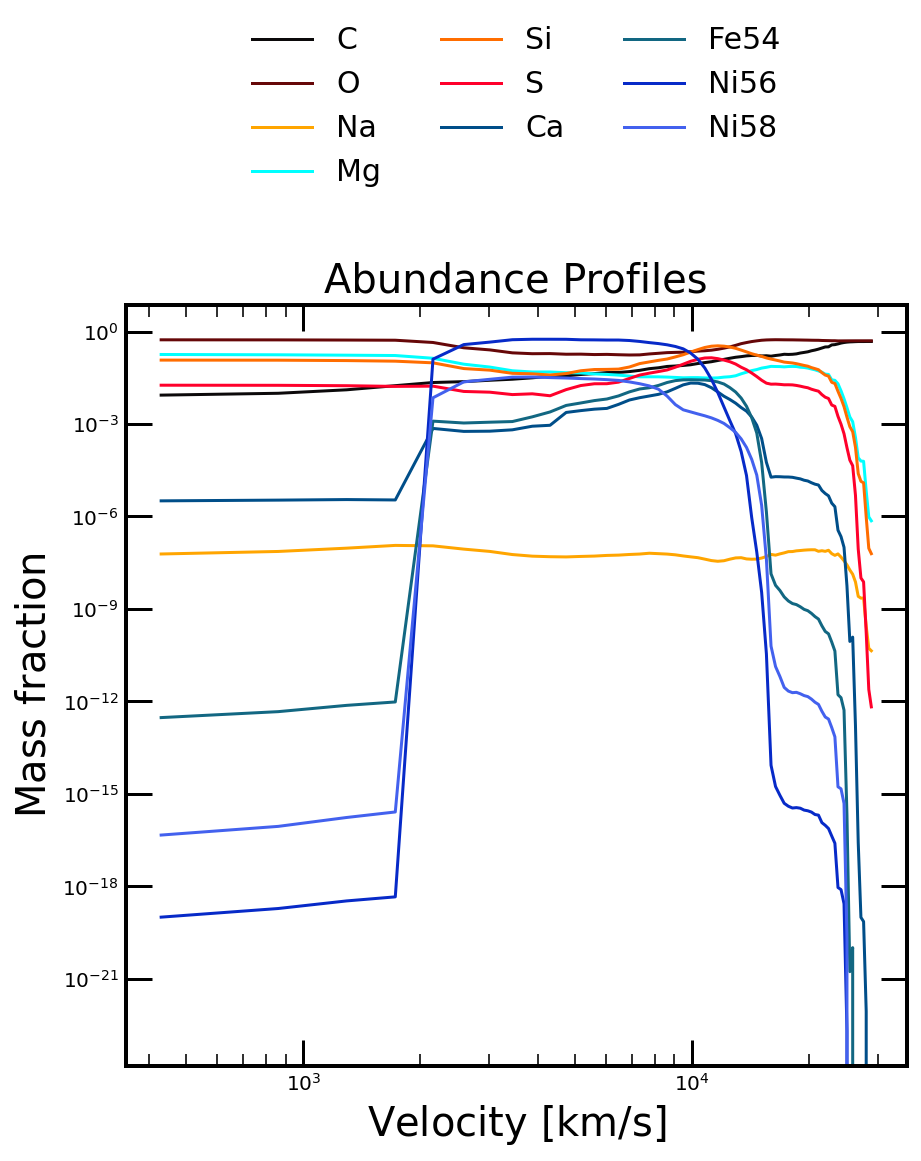

In [349]:
abundance_df = plot_abundance(vm_abundances, save_file=True)
#plt.ylim(0, 0.2)
# plt.show();

In [350]:
# Open the model
model_dat = '/Users/anirbandutta/Documents/SNEXP/Violent_Merger_2012_Model_Ejecta/' + model_name
model_df = pd.read_csv(model_dat, sep='\s+', engine='python')

In [351]:
# plt.plot(model_df['velocity'], model_df['density'], '--')
# plt.xscale('log')
# plt.yscale('log')

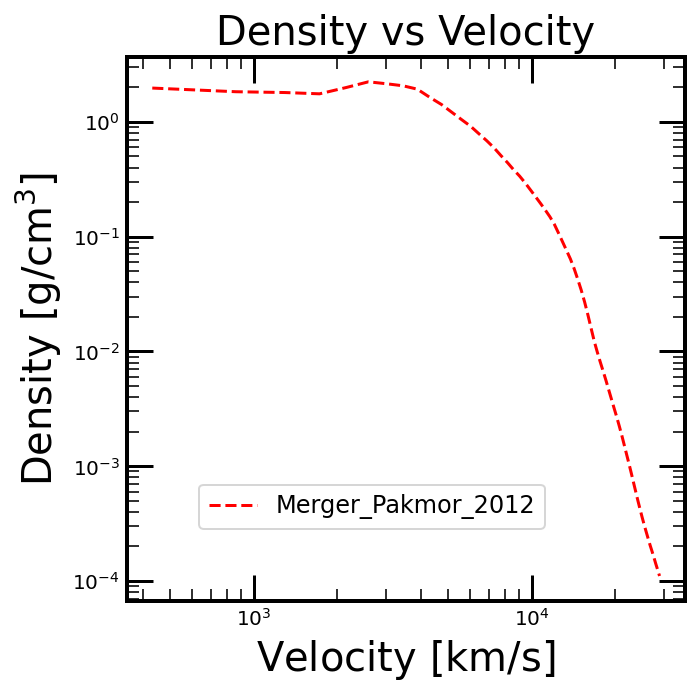

In [352]:
density_df = plot_density(vm_density, model_name='Merger_Pakmor_2012', log_axis=True)
#plt.show()

In [353]:
density_vm = density_df['Density']
velocity_vm = density_df['Velocity']

density_homo = homologous_expansion(density_vm, 0.001157, 1)

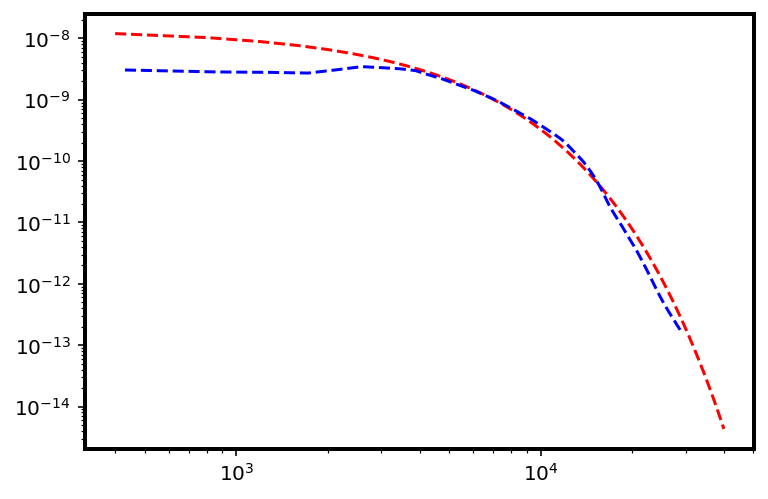

In [354]:
plt.plot(model_df['velocity'] / 10**5, model_df['density'], 'r--')
plt.plot(velocity_vm,  density_homo, 'b--')
plt.xscale('log')
plt.yscale('log')

In [355]:
vm_density_df = pd.DataFrame({'velocity': velocity_vm, 'density': density_homo})
vm_abundance_df = pd.concat([vm_density_df, abundance_df], axis=1)

In [356]:
sedona_abundances(model_df, vm_abundance_df, model_name, save_file=True)

,radius,velocity,density,temp,c12,o16,ne20,mg24,si28,s32,ca40,fe54,ni56,ni58
0,3.4560e+12,4.0000e+07,1.196936e-08,1.9600e+04,0.009,0.565,0.093,0.189,0.124,0.019,0.000,0.000,0.000,0.000
1,6.9120e+12,8.0000e+07,1.030359e-08,1.9200e+04,0.010,0.562,0.100,0.186,0.123,0.019,0.000,0.000,0.000,0.000
2,1.0368e+13,1.2000e+08,8.869645e-09,1.8800e+04,0.013,0.557,0.111,0.180,0.121,0.018,0.000,0.000,0.000,0.000
3,1.3824e+13,1.6000e+08,7.635260e-09,1.8400e+04,0.017,0.550,0.123,0.176,0.116,0.017,0.000,0.000,0.000,0.000
4,1.7280e+13,2.0000e+08,6.572665e-09,1.8000e+04,0.021,0.493,0.117,0.154,0.106,0.018,0.001,0.001,0.085,0.004
5,2.0736e+13,2.4000e+08,5.657950e-09,1.7600e+04,0.024,0.375,0.093,0.113,0.080,0.015,0.001,0.001,0.282,0.017
6,2.4192e+13,2.8000e+08,4.870535e-09,1.7200e+04,0.026,0.287,0.072,0.082,0.062,0.012,0.001,0.001,0.432,0.026
7,2.7648e+13,3.2000e+08,4.192705e-09,1.6800e+04,0.028,0.241,0.058,0.065,0.053,0.010,0.001,0.001,0.512,0.031
8,3.1104e+13,3.6000e+08,3.609208e-09,1.6400e+04,0.030,0.207,0.047,0.054,0.045,0.009,0.001,0.001,0.571,0.034
9,3.4560e+13,4.0000e+08,3.106916e-09,1.6000e+04,0.034,0.199,0.043,0.051,0.043,0.010,0.001,0.002,0.583,0.034


In [357]:
vm_abundance_df

,velocity,density,c12,o16,ne20,mg24,si28,s32,ca40,fe54,ni56,ni58
0,430.810073,3.054620e-09,0.009,0.565,0.094,0.189,0.124,0.019,0.000,0.000,0.000,0.000
1,861.620146,2.838141e-09,0.010,0.562,0.101,0.185,0.123,0.019,0.000,0.000,0.000,0.000
2,1292.430219,2.792760e-09,0.014,0.555,0.114,0.179,0.120,0.018,0.000,0.000,0.000,0.000
3,1723.240292,2.721547e-09,0.018,0.548,0.127,0.175,0.115,0.017,0.000,0.000,0.000,0.000
4,2154.050365,3.091862e-09,0.023,0.462,0.111,0.142,0.101,0.018,0.001,0.001,0.133,0.007
5,2584.860438,3.463255e-09,0.025,0.309,0.079,0.091,0.065,0.012,0.001,0.001,0.393,0.024
6,3015.670511,3.326509e-09,0.027,0.264,0.064,0.073,0.058,0.011,0.001,0.001,0.472,0.029
7,3446.480583,3.196414e-09,0.029,0.211,0.049,0.055,0.046,0.009,0.001,0.001,0.564,0.034
8,3877.290656,2.987115e-09,0.033,0.198,0.043,0.051,0.044,0.010,0.001,0.002,0.583,0.035
9,4308.100729,2.526511e-09,0.037,0.200,0.043,0.051,0.040,0.009,0.001,0.003,0.584,0.033
